In [206]:
import pandas as pd
import numpy as np

In [207]:
df = pd.read_csv('dataset/hcho.csv')
df

,HCHO,Location,Current date,Next date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000176,Nuwara Eliya Proper,2019-01-01,2019-01-02
3,0.000176,Kandy Proper,2019-01-01,2019-01-02
4,0.000176,"Bibile, Monaragala",2019-01-01,2019-01-02
...,...,...,...,...
12649,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01
12650,0.000080,Kandy Proper,2023-12-31,2024-01-01
12651,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01
12652,0.000065,Kurunegala Proper,2023-12-31,2024-01-01


In [208]:
df['Current date'] = pd.to_datetime(df['Current date'])
df['Next date'] = pd.to_datetime(df['Next date'])

In [209]:
# Extracting year and month for seasonal analysis
df['Year'] = df['Current date'].dt.year
df['Month'] = df['Current date'].dt.month

In [210]:
df

,HCHO,Location,Current date,Next date,Year,Month
0,0.000197,Colombo Proper,2019-01-01,2019-01-02,2019,1
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02,2019,1
2,0.000176,Nuwara Eliya Proper,2019-01-01,2019-01-02,2019,1
3,0.000176,Kandy Proper,2019-01-01,2019-01-02,2019,1
4,0.000176,"Bibile, Monaragala",2019-01-01,2019-01-02,2019,1
...,...,...,...,...,...,...
12649,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01,2023,12
12650,0.000080,Kandy Proper,2023-12-31,2024-01-01,2023,12
12651,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01,2023,12
12652,0.000065,Kurunegala Proper,2023-12-31,2024-01-01,2023,12


In [211]:
# Grouping data by year and month for seasonal analysis
seasonal_data = df.groupby(['Year', 'Month'])['HCHO'].mean().reset_index()

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

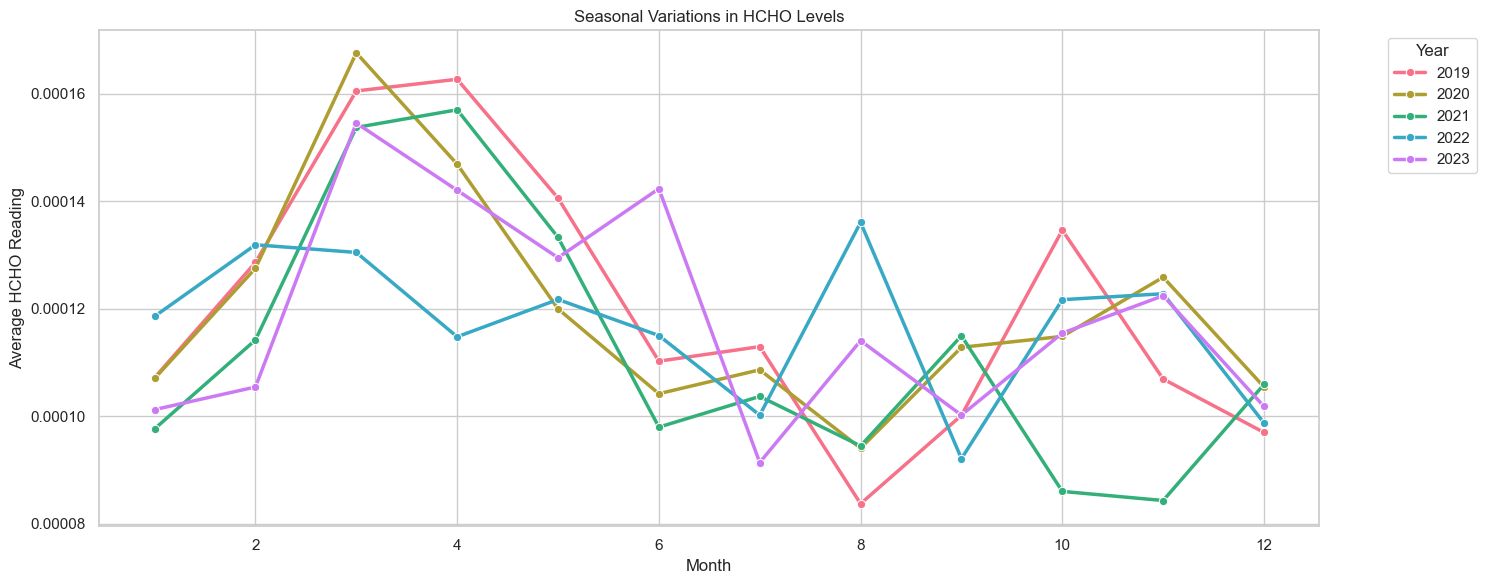

In [213]:
# Plotting seasonal variations
plt.figure(figsize=(15, 6))
palette = sns.color_palette("husl", len(seasonal_data['Year'].unique()))  # Define a custom color palette
sns.lineplot(x="Month", y="HCHO", hue="Year", data=seasonal_data, palette=palette, marker='o', linewidth=2.5)
plt.title('Seasonal Variations in HCHO Levels')
plt.xlabel('Month')
plt.ylabel('Average HCHO Reading')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

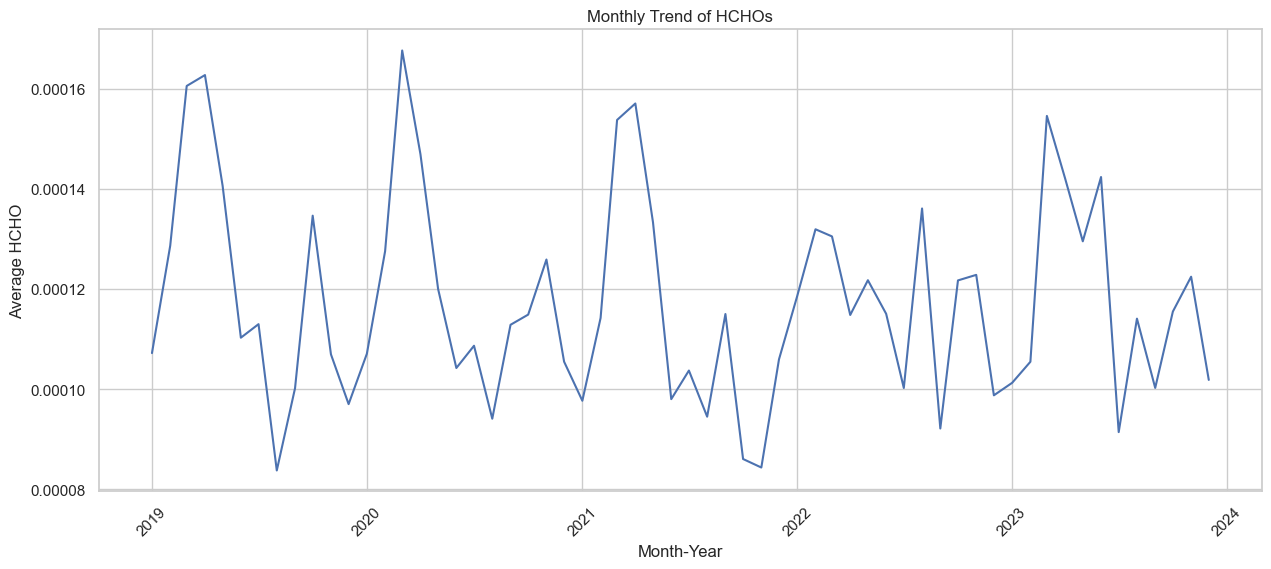

In [214]:


# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Aggregating the HCHOs on a monthly basis
df['Month-Year'] = df['Current date'].dt.to_period('M')
monthly_data = df.groupby('Month-Year')['HCHO'].mean().reset_index()

# Converting 'Month-Year' back to datetime for plotting
monthly_data['Month-Year'] = monthly_data['Month-Year'].dt.to_timestamp()

# Plotting the monthly trend of HCHOs
plt.figure(figsize=(15, 6))
sns.lineplot(x='Month-Year', y='HCHO', data=monthly_data)
plt.title('Monthly Trend of HCHOs')
plt.xlabel('Month-Year')
plt.ylabel('Average HCHO')
plt.xticks(rotation=45)
plt.show()


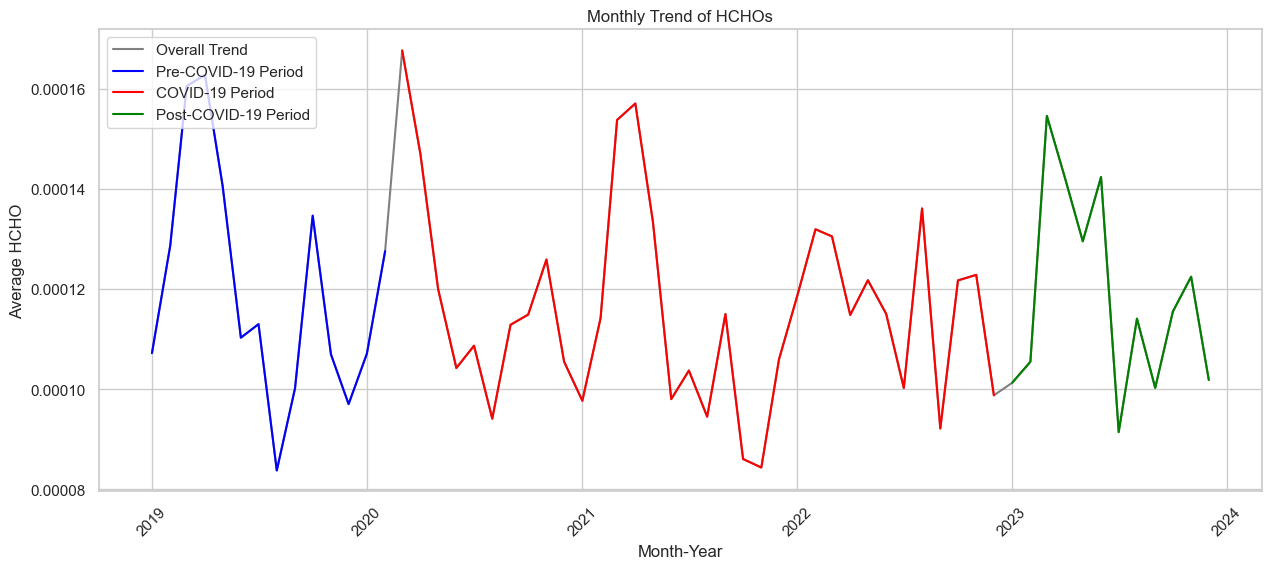

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Converting 'Current date' to datetime and extracting the month and year
df['Month-Year'] = pd.to_datetime(df['Current date']).dt.to_period('M')
monthly_data = df.groupby('Month-Year')['HCHO'].mean().reset_index()

# Converting 'Month-Year' back to datetime for plotting
monthly_data['Month-Year'] = monthly_data['Month-Year'].dt.to_timestamp()

# Plotting the monthly trend of HCHOs
plt.figure(figsize=(15, 6))
sns.lineplot(x='Month-Year', y='HCHO', data=monthly_data, color='gray', label='Overall Trend')

# Highlighting the periods
pre_corona = monthly_data[(monthly_data['Month-Year'] >= '2019-01-01') & (monthly_data['Month-Year'] <= '2020-02-29')]
sns.lineplot(x='Month-Year', y='HCHO', data=pre_corona, color='blue', label='Pre-COVID-19 Period')

corona = monthly_data[(monthly_data['Month-Year'] >= '2020-03-01') & (monthly_data['Month-Year'] <= '2022-12-31')]
sns.lineplot(x='Month-Year', y='HCHO', data=corona, color='red', label='COVID-19 Period')

post_corona = monthly_data[monthly_data['Month-Year'] >= '2023-01-01']
sns.lineplot(x='Month-Year', y='HCHO', data=post_corona, color='green', label='Post-COVID-19 Period')

plt.title('Monthly Trend of HCHOs')
plt.xlabel('Month-Year')
plt.ylabel('Average HCHO')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()


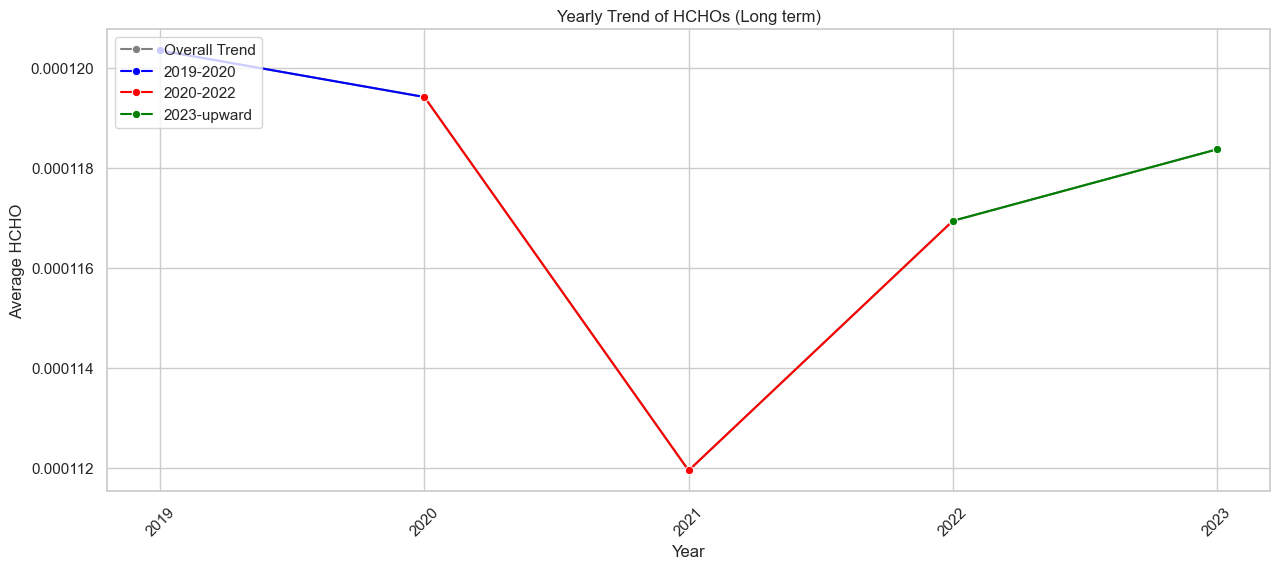

In [216]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Converting 'Current date' to datetime and extracting the year
df['Year'] = pd.to_datetime(df['Current date']).dt.year
yearly_data = df.groupby('Year')['HCHO'].mean().reset_index()

# Plotting the yearly trend of HCHOs
plt.figure(figsize=(15, 6))
sns.lineplot(x='Year', y='HCHO', data=yearly_data, color='gray', label='Overall Trend',marker='o')

# Highlighting the periods
pre_corona = yearly_data[(yearly_data['Year'] >= 2019) & (yearly_data['Year'] <= 2020)]
sns.lineplot(x='Year', y='HCHO', data=pre_corona, color='blue', label='2019-2020', marker='o')

corona = yearly_data[(yearly_data['Year'] >= 2020) & (yearly_data['Year'] <= 2022)]
sns.lineplot(x='Year', y='HCHO', data=corona, color='red', label='2020-2022',marker='o')

post_corona = yearly_data[yearly_data['Year'] >= 2022]
sns.lineplot(x='Year', y='HCHO', data=post_corona, color='green', label='2023-upward',marker='o')

plt.title('Yearly Trend of HCHOs (Long term)')
plt.xlabel('Year')
plt.ylabel('Average HCHO')
plt.xticks(np.arange(min(yearly_data['Year']), max(yearly_data['Year'])+1, 1), rotation=45)
plt.legend(loc='upper left')
plt.show()

In [217]:
import plotly.express as px

# Filter data for the years 2019 
filtered_data = df[df['Year'].isin([2019])]

# Calculate the mean HCHO for each month and year
monthly_data = filtered_data.groupby(['Year', 'Month'])['HCHO'].mean().reset_index()

# Create an interactive plot
fig = px.line(monthly_data, x='Month', y='HCHO', color='Year', title='Monthly Trend of HCHO Levels (Pre Corona Period 2019)',
              labels={'Month': 'Month', 'HCHO': 'Average HCHO Reading', 'Year': 'Year'})

# Format y-axis to display values in standard notation
fig.update_layout(yaxis_tickformat=".10f")

fig.show()

In [218]:
# Filter data for the years 2020 to 2022
filtered_data = df[df['Year'].isin([2020,2021, 2022])]

# Calculate the mean HCHO for each month and year
monthly_data = filtered_data.groupby(['Year', 'Month'])['HCHO'].mean().reset_index()

# Create an interactive plot
fig = px.line(monthly_data, x='Month', y='HCHO', color='Year', title='Monthly Trend of HCHO Levels (Corona Period 2020 to 2022)',
              labels={'Month': 'Month', 'HCHO': 'Average HCHO Reading', 'Year': 'Year'})

# Format y-axis to display values in standard notation
fig.update_layout(yaxis_tickformat=".10f")

fig.show()

In [219]:
# Filter data for the years 2023 upward
filtered_data = df[df['Year'].isin([2023,2024])]

# Calculate the mean HCHO for each month and year
monthly_data = filtered_data.groupby(['Year', 'Month'])['HCHO'].mean().reset_index()

# Create an interactive plot
fig = px.line(monthly_data, x='Month', y='HCHO', color='Year', title='Monthly Trend of HCHO Levels (Post Corona Period)',
              labels={'Month': 'Month', 'HCHO': 'Average HCHO Reading', 'Year': 'Year'})

# Format y-axis to display values in standard notation
fig.update_layout(yaxis_tickformat=".10f")

fig.show()

### Bar and Pie Chart - Average HCHO Levels for Each Location

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1548\1333282147.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




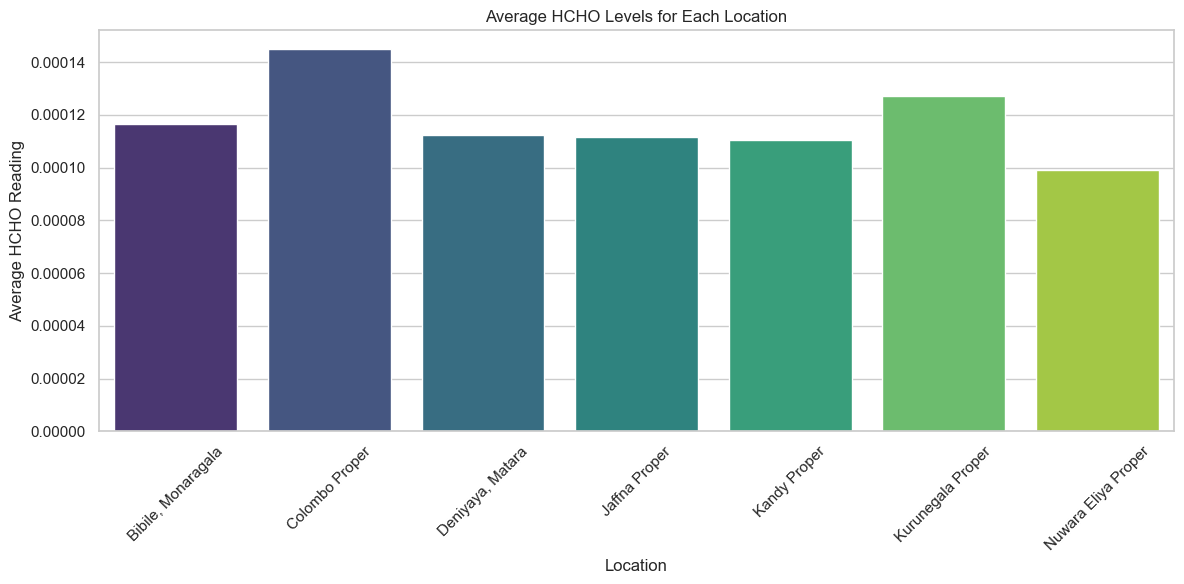

In [220]:
# Calculate the mean HCHO for each location
location_data = df.groupby('Location')['HCHO'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='HCHO', data=location_data, palette='viridis')
plt.title('Average HCHO Levels for Each Location')
plt.xlabel('Location')
plt.ylabel('Average HCHO Reading')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Create pie chart
fig = px.pie(location_data, values='HCHO', names='Location', title='Average HCHO Levels for Each Location')

# Update pie chart layout to make it larger
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    margin=dict(l=50, r=50, b=100, t=100, pad=4)
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Heatmap - HCHO Levels by Location and Date

In [221]:
# Loop through each unique location and create a heatmap
for location in df['Location'].unique():
    location_data = df[df['Location'] == location].pivot_table(index='Location', columns='Current date', values='HCHO', aggfunc='mean')
    
    fig = px.imshow(location_data, labels=dict(color="Average HCHO Reading"),
                    title=f'HCHO Levels for {location}',
                    x=location_data.columns.strftime('%Y-%m-%d'),
                    y=location_data.index)
    
    fig.show()

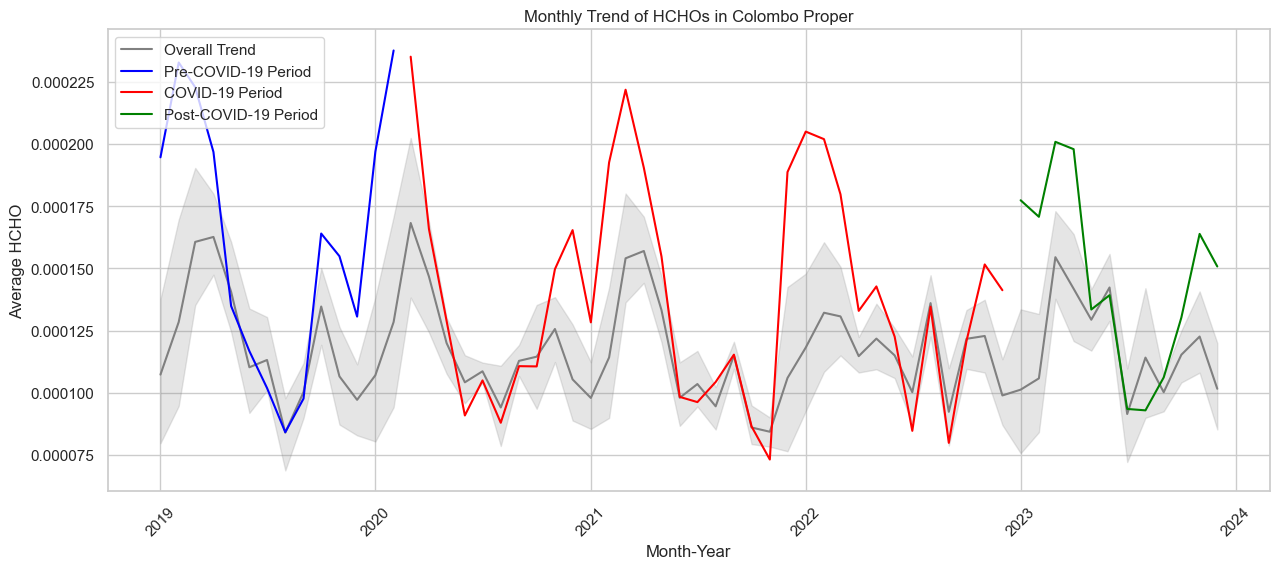

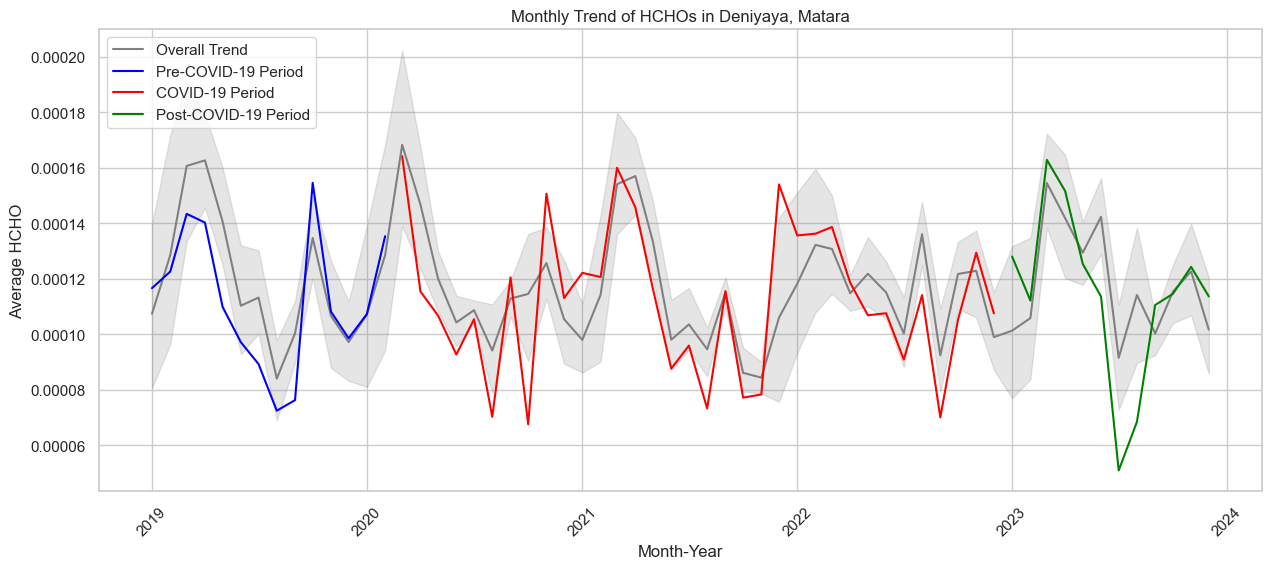

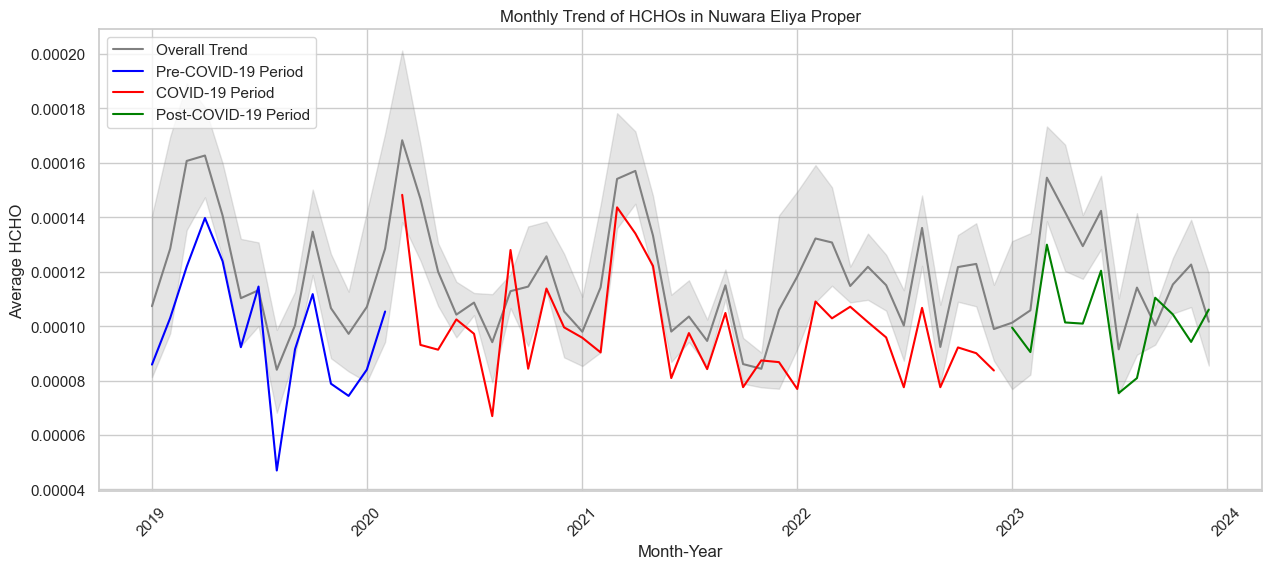

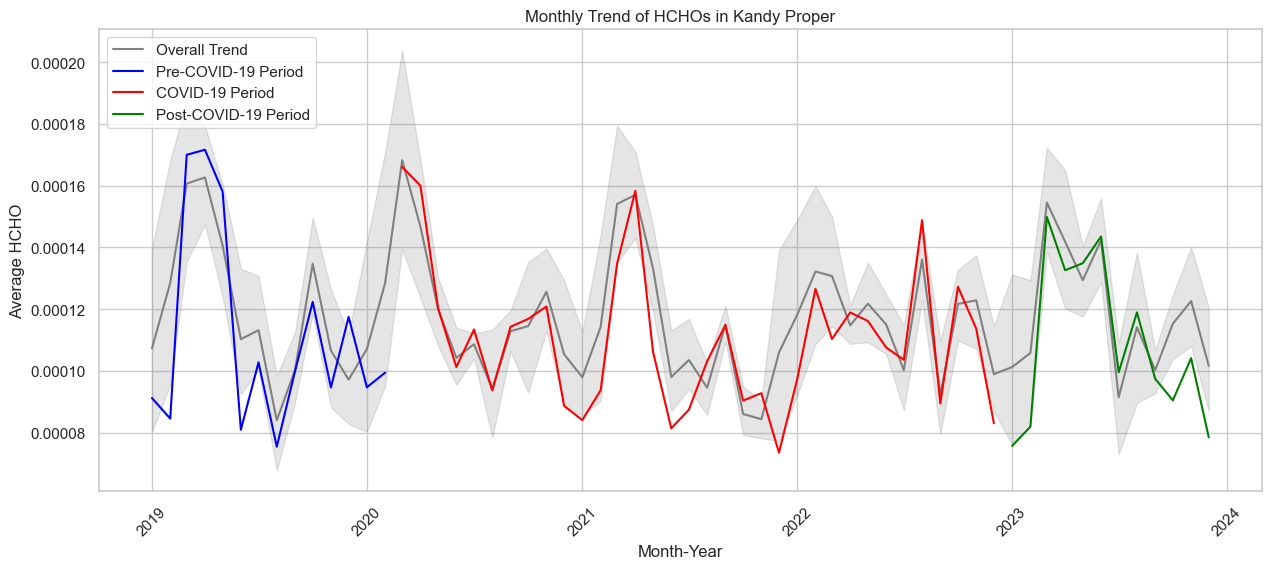

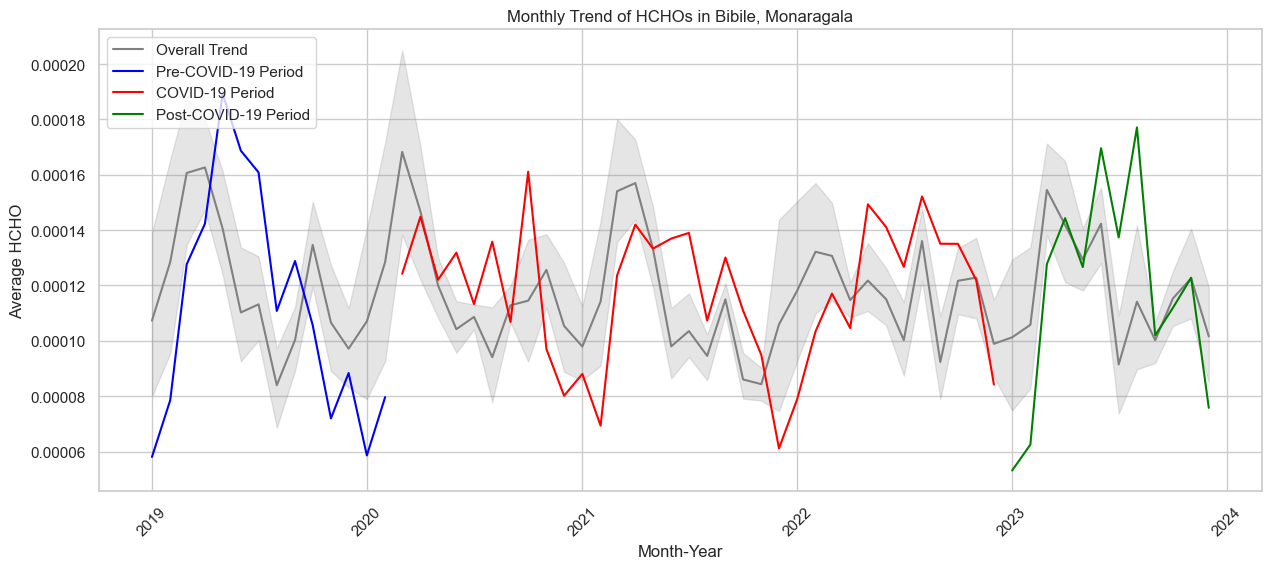

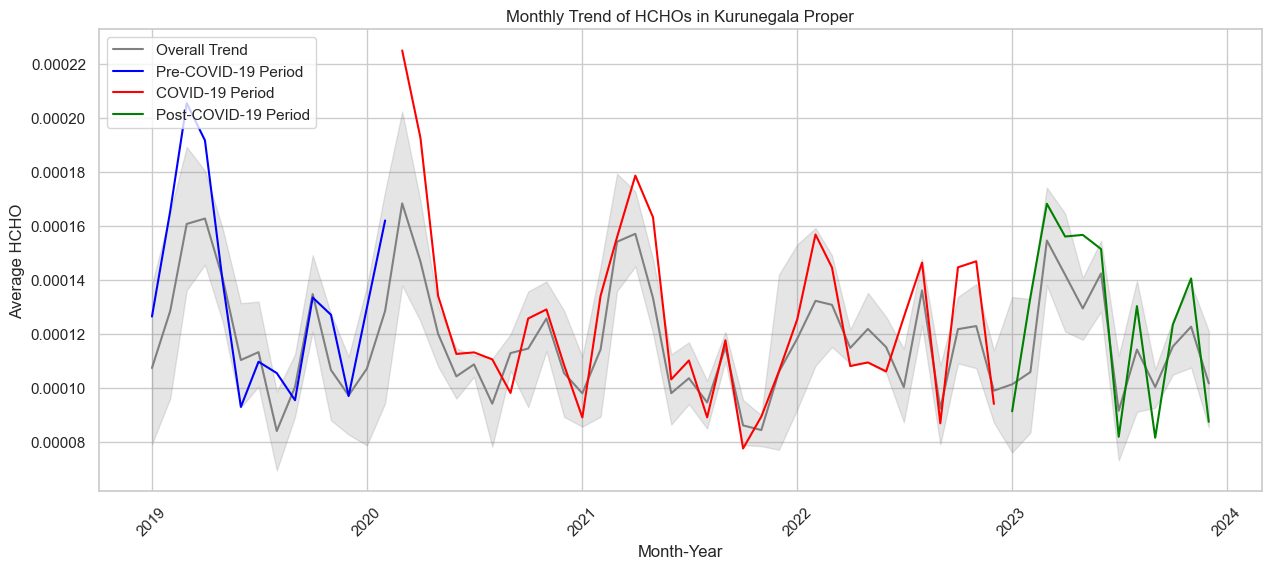

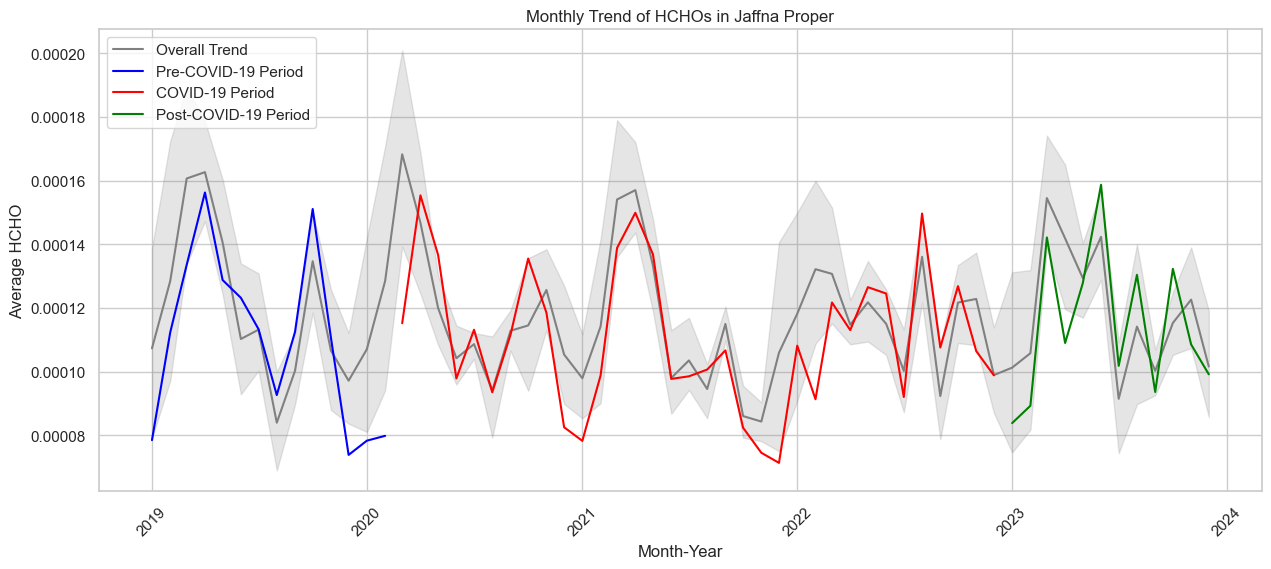

In [225]:
# Convert 'Current date' to datetime format
df['Current date'] = pd.to_datetime(df['Current date'])

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Convert 'Current date' to datetime and extracting the month and year
df['Month-Year'] = df['Current date'].dt.to_period('M')
monthly_data = df.groupby(['Location', 'Month-Year'])['HCHO'].mean().reset_index()

# Convert 'Month-Year' back to datetime for plotting
monthly_data['Month-Year'] = monthly_data['Month-Year'].dt.to_timestamp()

# Loop through each unique location and create separate plots
for location in df['Location'].unique():
    location_data = monthly_data[monthly_data['Location'] == location]
    
    plt.figure(figsize=(15, 6))
    sns.lineplot(x='Month-Year', y='HCHO', data=monthly_data, color='gray', label='Overall Trend')
    
    # Highlighting the periods
    pre_corona = location_data[(location_data['Month-Year'] >= '2019-01-01') & (location_data['Month-Year'] <= '2020-02-29')]
    sns.lineplot(x='Month-Year', y='HCHO', data=pre_corona, color='blue', label='Pre-COVID-19 Period')
    
    corona = location_data[(location_data['Month-Year'] >= '2020-03-01') & (location_data['Month-Year'] <= '2022-12-31')]
    sns.lineplot(x='Month-Year', y='HCHO', data=corona, color='red', label='COVID-19 Period')
    
    post_corona = location_data[location_data['Month-Year'] >= '2023-01-01']
    sns.lineplot(x='Month-Year', y='HCHO', data=post_corona, color='green', label='Post-COVID-19 Period')
    
    plt.title(f'Monthly Trend of HCHOs in {location}')
    plt.xlabel('Month-Year')
    plt.ylabel('Average HCHO')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.show()